# Kernels – Part 2

## 1. Introduction

Kernels allow SVMs to operate in a transformed feature space without explicitly computing it (called the “kernel trick”). This helps SVMs handle complex, non-linear patterns.

We'll demonstrate:
- Using an RBF (Radial Basis Function) kernel
- Visualizing non-linear decision boundaries


## 2. Load and Prepare Data

We'll use the Iris dataset again but keep it binary for simplicity.


In [3]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load and filter data
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 2]
y = y[y != 2]

# Scale and reduce dimensions
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)


## 3. Train SVM with RBF Kernel


In [5]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=1.0, gamma='scale')  # RBF kernel
clf.fit(X_reduced, y)


SVC()

## 4. Visualize Non-linear Decision Boundary


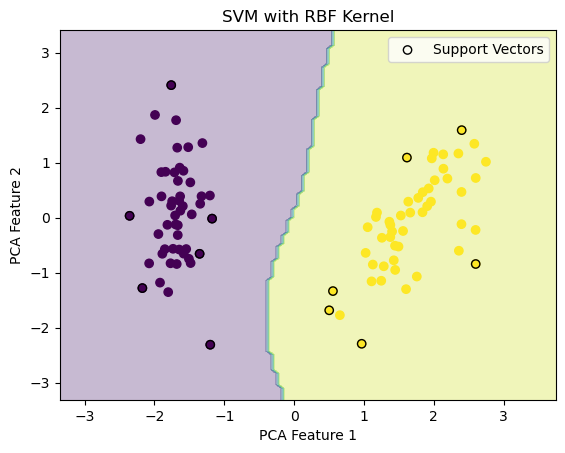

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Mesh grid
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], edgecolors='k', facecolors='none', label='Support Vectors')
plt.title("SVM with RBF Kernel")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.legend()
plt.show()


## 5. Summary

- RBF kernels can model complex, curved boundaries.
- The `gamma` parameter controls how far the influence of a single training example reaches.
- Support vectors still define the boundary, even in transformed space.
